In [1]:
%matplotlib inline
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from itertools import islice
from pathlib import Path

In [2]:
mx.random.seed(0)
np.random.seed(0)

In [3]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

In [4]:
dataset = get_dataset("exchange_rate", regenerate = True)

saving time-series into /Users/justinjiang/.mxnet/gluon-ts/datasets/exchange_rate/train/data.json
saving time-series into /Users/justinjiang/.mxnet/gluon-ts/datasets/exchange_rate/test/data.json


In [7]:
train_entry = next(iter(dataset.train))
train_entry.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'item_id', 'source'])

In [8]:
test_entry = next(iter(dataset.test))
test_entry.keys()

dict_keys(['start', 'target', 'feat_static_cat', 'item_id', 'source'])

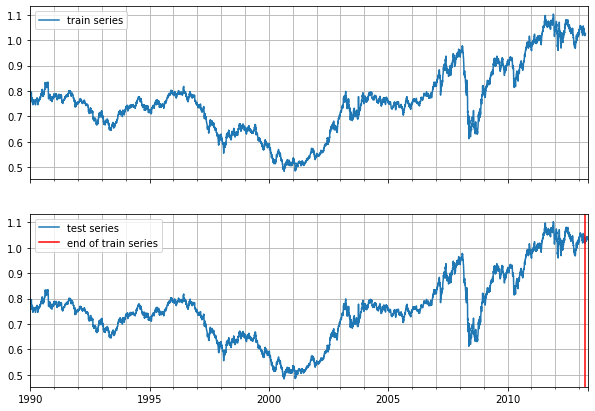

In [9]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()


In [10]:
print(f"Length of forecasting window in test dataset: {len(test_series) - len(train_series)}")
print(f"Recommended prediction horizon: {dataset.metadata.prediction_length}")
print(f"Frequency of the time series: {dataset.metadata.freq}")

Length of forecasting window in test dataset: 30
Recommended prediction horizon: 30
Frequency of the time series: 1B


In [14]:
from gluonts.dataset.field_names import FieldName
from iexfinance.data_apis import get_time_series
Token = IEX_TOKEN='sk_434806dae94a4ee69daa8375f33da6f5'

In [20]:
get_time_series("PRICE", "AAPL", token = Token)

IEXQueryError: An error occurred while making the query.